# Introduction
- The goal of this section is to train a convolutional neural network on custom images (radiographss) from scratch. To achieve this, there are few operations we need to perform, which includes:
  - Connecting google colab to our google drive
  - Data Preparation: creating training and test data from the raw data
  - Building the CNN architecture
  - Training the network with and without transfer learning using pretrained models such as Vgg16, ResNet50, DenseNet121, MobileNetV1 and EfficientNet


- Dataset:https://stanfordmlgroup.github.io/competitions/mura/

In [ ]:
# Connect Google Colab to Google Drive
# from google.colab import drive
# drive.mount("/content/drive")

In [1]:
# install opencv-python
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# install keras-tuner

!pip install keras-tuner


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# mediumdataset 64 multiclass train-test split

In [3]:
# import the required libraries
import cv2
import numpy as np
import os
import shutil
import random

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from tensorflow import keras
import keras_tuner as kt

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [4]:
# Prepare training and testing images

def create_directory(train, test, category):
  if not os.path.exists(train):
    os.makedirs(train) # create train directory
  if not os.path.exists(test):
    os.makedirs(test) # create test directory
  if not os.path.exists(os.path.join(train, category)):
    os.makedirs(os.path.join(train, category))
  if not os.path.exists(os.path.join(test, category)):
    os.makedirs(os.path.join(test, category))

In [5]:
# path to the images

input_dir = r"C:\Users\OLASUNKANMI\Desktop\UoL DS Course files\Semester C\UoL Research Project Materials\New_Mura\medium_dataset\64\Multiclass"

os.listdir(input_dir)

['XR_ELBOW',
 'XR_FINGER',
 'XR_FOREARM',
 'XR_HAND',
 'XR_HUMERUS',
 'XR_SHOULDER',
 'XR_WRIST']

In [6]:
# creation of train and test directories

def get_image(input_dir, category):
  # image directory
  img_dir = os.path.join(input_dir, category)

  # define the percentage of images to use for testing
  test_percent = 0.3

  # sanity for image format
  image_files = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f)) and f.endswith(".png")]

  # shuffle the images
  random.shuffle(image_files)

  # calculate the number of images to use for training and testing
  num_images = len(image_files)
  num_test = int(test_percent * num_images)
  num_train = num_images - num_test

  # create paths to training and testing
  train_dir = os.path.join(input_dir, "train")
  test_dir = os.path.join(input_dir, "test")

  # create actual training and testing directories
  create_directory(train_dir, test_dir, category)

  # copy the image to the training and testing directories
  for i in range(num_images):
    img_file = image_files[i]

    if i < num_train:
      shutil.copy(img_file, os.path.join(train_dir, category))

    else:
      shutil.copy(img_file, os.path.join(test_dir, category))

In [7]:
# categorizing negative and positive images into the train and test directories
categories = os.listdir(input_dir)

for category in categories:
  get_image(input_dir, category)

In [8]:
# check the size of the images
def checkImageSize(dir, category):
  cat_path = os.path.join(dir, category)
  images = os.listdir(cat_path)
  print(len(images))

  for i in range(5):
    img = images[i]
    image = cv2.imread(os.path.join(cat_path, img))
    print(image.shape)

In [9]:
# path to images in the train directory
train_dir = r"C:\Users\OLASUNKANMI\Desktop\UoL DS Course files\Semester C\UoL Research Project Materials\New_Mura\medium_dataset\64\Multiclass\train"

In [10]:
checkImageSize(train_dir, "XR_ELBOW")

280
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [11]:
checkImageSize(train_dir, "XR_FINGER")

280
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [12]:
checkImageSize(train_dir, "XR_FOREARM")

280
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [13]:
checkImageSize(train_dir, "XR_HAND")

280
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [14]:
checkImageSize(train_dir, "XR_HUMERUS")

280
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [15]:
checkImageSize(train_dir, "XR_SHOULDER")

280
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [16]:
checkImageSize(train_dir, "XR_WRIST")

280
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [17]:
# path to images in the train directory
test_dir = r"C:\Users\OLASUNKANMI\Desktop\UoL DS Course files\Semester C\UoL Research Project Materials\New_Mura\medium_dataset\64\Multiclass\test"

In [18]:
checkImageSize(test_dir, "XR_ELBOW")

120
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [19]:
checkImageSize(test_dir, "XR_FINGER")

120
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [20]:
checkImageSize(test_dir, "XR_FOREARM")

120
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [21]:
checkImageSize(test_dir, "XR_HAND")

120
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [22]:
checkImageSize(test_dir, "XR_HUMERUS")

120
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [23]:
checkImageSize(test_dir, "XR_SHOULDER")

120
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [24]:
checkImageSize(test_dir, "XR_WRIST")

60
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [4]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(142)
tf.random.set_seed(42)

# mediumdata 64 multiclass gridsearch VGG16

Found 1372 images belonging to 7 classes.
Found 588 images belonging to 7 classes.
Found 840 images belonging to 7 classes.
Epoch 1/10
43/43 [==============================] - 975s 22s/step - loss: 1.6686 - accuracy: 0.3739 - val_loss: 1.1903 - val_accuracy: 0.6037
Epoch 2/10
43/43 [==============================] - 971s 23s/step - loss: 1.1492 - accuracy: 0.6013 - val_loss: 1.0970 - val_accuracy: 0.6361
Epoch 3/10
43/43 [==============================] - 994s 23s/step - loss: 0.9456 - accuracy: 0.6655 - val_loss: 0.9864 - val_accuracy: 0.6361
Epoch 4/10
43/43 [==============================] - 996s 23s/step - loss: 0.8490 - accuracy: 0.6990 - val_loss: 0.9016 - val_accuracy: 0.6922
Epoch 5/10
43/43 [==============================] - 1262s 30s/step - loss: 0.7469 - accuracy: 0.7434 - val_loss: 0.8573 - val_accuracy: 0.6888
Epoch 6/10
43/43 [==============================] - 1091s 25s/step - loss: 0.6853 - accuracy: 0.7675 - val_loss: 0.8271 - val_accuracy: 0.7109
Epoch 7/10
43/43 [====

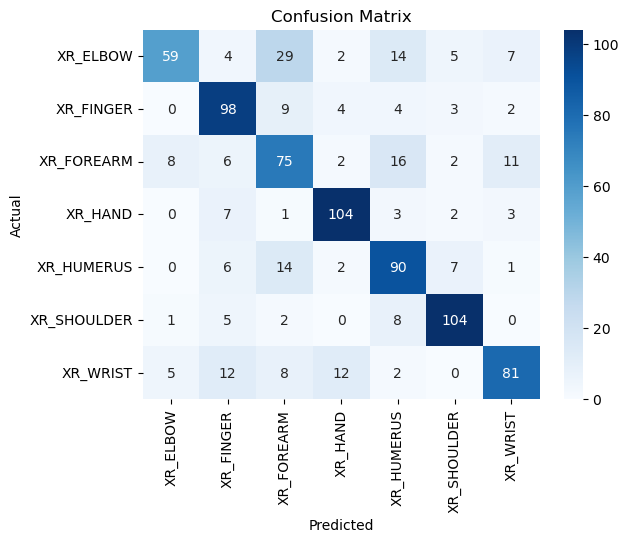

Sensitivity: [0.49166667 0.81666667 0.625      0.86666667 0.75       0.86666667
 0.675     ]
Specificity: [0.80821918 0.71014493 0.54347826 0.82539683 0.65693431 0.84552846
 0.77142857]


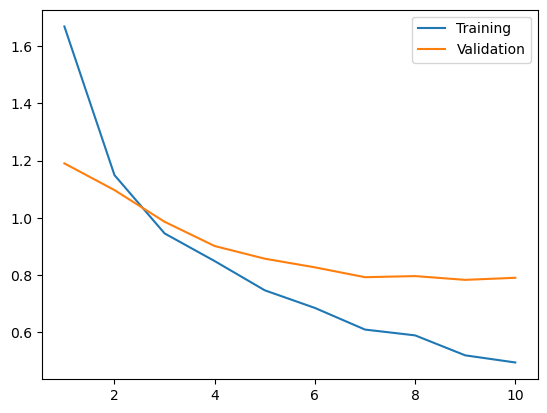

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Define paths
train_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/medium_dataset/64/Multiclass/train"
test_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/medium_dataset/64/Multiclass/test"


# Data Preprocessing
image_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Load VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # Freeze base model

# Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=out)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on Test Data
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate Sensitivity and Specificity
sensitivity = cm.diagonal() / cm.sum(axis=1)
specificity = cm.diagonal() / cm.sum(axis=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Visualize the loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="Training")
plt.plot(epochs, val_loss, label="Validation")
plt.legend(loc="best")
plt.show()

In [7]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(142)
tf.random.set_seed(42)

# mediumdata 64 multiclass 5-Fold CV

Training fold 1/5
Found 1372 images belonging to 7 classes.
Found 588 images belonging to 7 classes.
Epoch 1/10
43/43 [==============================] - 1577s 36s/step - loss: 1.6686 - accuracy: 0.3739 - val_loss: 1.1903 - val_accuracy: 0.6037
Epoch 2/10
43/43 [==============================] - 1640s 38s/step - loss: 1.1492 - accuracy: 0.6013 - val_loss: 1.0970 - val_accuracy: 0.6361
Epoch 3/10
43/43 [==============================] - 1662s 39s/step - loss: 0.9456 - accuracy: 0.6655 - val_loss: 0.9864 - val_accuracy: 0.6361
Epoch 4/10
43/43 [==============================] - 1795s 42s/step - loss: 0.8490 - accuracy: 0.6990 - val_loss: 0.9016 - val_accuracy: 0.6922
Epoch 5/10
43/43 [==============================] - 1842s 43s/step - loss: 0.7469 - accuracy: 0.7434 - val_loss: 0.8573 - val_accuracy: 0.6888
Epoch 6/10
43/43 [==============================] - 1800s 42s/step - loss: 0.6853 - accuracy: 0.7675 - val_loss: 0.8271 - val_accuracy: 0.7109
Epoch 7/10
43/43 [=======================

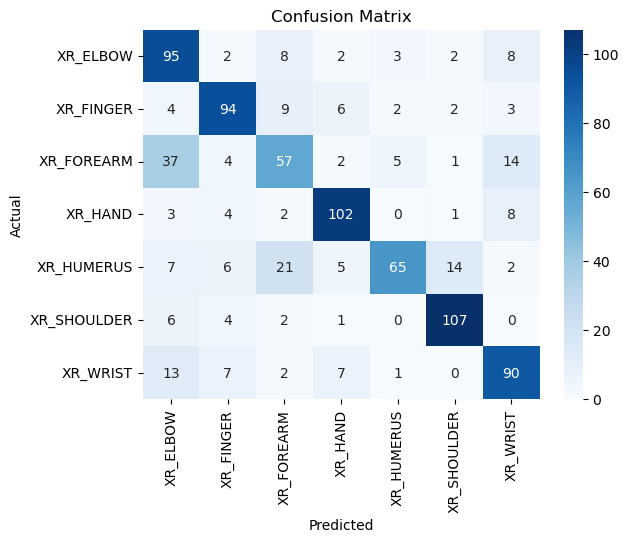

Sensitivity: [0.79166667 0.78333333 0.475      0.85       0.54166667 0.89166667
 0.75      ]
Specificity: [0.57575758 0.7768595  0.56435644 0.816      0.85526316 0.84251969
 0.72      ]


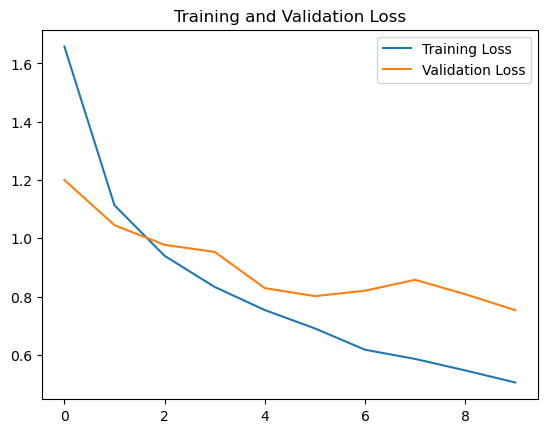

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold

# Define paths
train_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/medium_dataset/64/Multiclass/train"
test_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/medium_dataset/64/Multiclass/test"

# Data Preprocessing
image_size = (64, 64)
batch_size = 32
cv_folds = 5

# Image Data Generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
    base_model.trainable = False  # Freeze base model
    
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(7, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=out)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform Cross-Validation
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(train_generator.filenames)):
    print(f"Training fold {fold+1}/{cv_folds}")
    
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')
    
    val_generator = datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')
    
    model = create_model()
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on Test Data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Sensitivity and Specificity
sensitivity = cm.diagonal() / cm.sum(axis=1)
specificity = cm.diagonal() / cm.sum(axis=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Loss Visualization
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [10]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(142)
tf.random.set_seed(42)

# mediumdata 64 multiclass 10-Fold CV

Training fold 1/10
Found 1372 images belonging to 7 classes.
Found 588 images belonging to 7 classes.
Epoch 1/10
43/43 [==============================] - 777s 18s/step - loss: 1.6686 - accuracy: 0.3739 - val_loss: 1.1903 - val_accuracy: 0.6037
Epoch 2/10
43/43 [==============================] - 690s 16s/step - loss: 1.1492 - accuracy: 0.6013 - val_loss: 1.0970 - val_accuracy: 0.6361
Epoch 3/10
43/43 [==============================] - 695s 16s/step - loss: 0.9456 - accuracy: 0.6655 - val_loss: 0.9864 - val_accuracy: 0.6361
Epoch 4/10
43/43 [==============================] - 667s 16s/step - loss: 0.8490 - accuracy: 0.6990 - val_loss: 0.9016 - val_accuracy: 0.6922
Epoch 5/10
43/43 [==============================] - 705s 17s/step - loss: 0.7469 - accuracy: 0.7434 - val_loss: 0.8573 - val_accuracy: 0.6888
Epoch 6/10
43/43 [==============================] - 657s 15s/step - loss: 0.6853 - accuracy: 0.7675 - val_loss: 0.8271 - val_accuracy: 0.7109
Epoch 7/10
43/43 [============================

43/43 [==============================] - 298s 7s/step - loss: 0.8474 - accuracy: 0.6997 - val_loss: 0.9217 - val_accuracy: 0.6786
Epoch 5/10
43/43 [==============================] - 295s 7s/step - loss: 0.7715 - accuracy: 0.7347 - val_loss: 0.8811 - val_accuracy: 0.6905
Epoch 6/10
43/43 [==============================] - 295s 7s/step - loss: 0.7041 - accuracy: 0.7609 - val_loss: 0.8291 - val_accuracy: 0.7109
Epoch 7/10
43/43 [==============================] - 298s 7s/step - loss: 0.6506 - accuracy: 0.7726 - val_loss: 0.8172 - val_accuracy: 0.7177
Epoch 8/10
43/43 [==============================] - 286s 7s/step - loss: 0.6068 - accuracy: 0.7792 - val_loss: 0.8482 - val_accuracy: 0.6973
Epoch 9/10
43/43 [==============================] - 424s 10s/step - loss: 0.5469 - accuracy: 0.8047 - val_loss: 0.7834 - val_accuracy: 0.7449
Epoch 10/10
43/43 [==============================] - 624s 15s/step - loss: 0.5358 - accuracy: 0.8141 - val_loss: 0.7406 - val_accuracy: 0.7483
Training fold 7/10
Fo

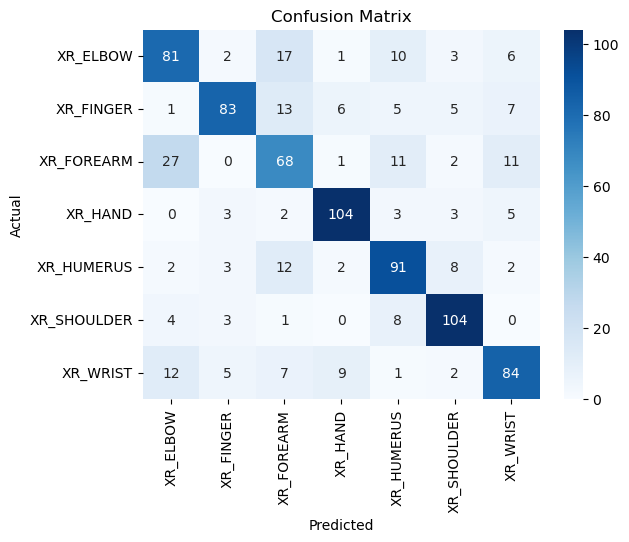

Sensitivity: [0.675      0.69166667 0.56666667 0.86666667 0.75833333 0.86666667
 0.7       ]
Specificity: [0.63779528 0.83838384 0.56666667 0.84552846 0.70542636 0.81889764
 0.73043478]


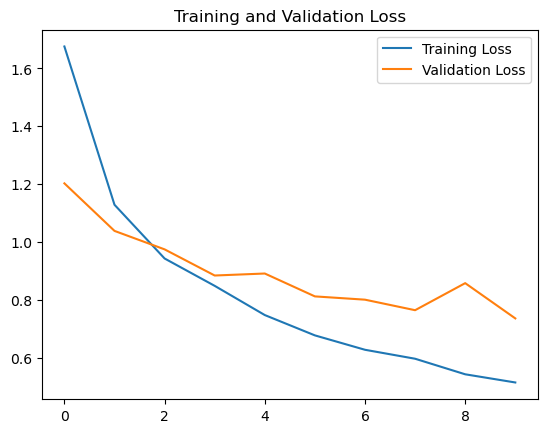

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold

# Define paths
train_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/medium_dataset/64/Multiclass/train"
test_dir = "C:/Users/OLASUNKANMI/Desktop/UoL DS Course files/Semester C/UoL Research Project Materials/New_Mura/medium_dataset/64/Multiclass/test"

# Data Preprocessing
image_size = (64, 64)
batch_size = 32
cv_folds = 10

# Image Data Generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
    base_model.trainable = False  # Freeze base model
    
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(7, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=out)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform Cross-Validation
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(train_generator.filenames)):
    print(f"Training fold {fold+1}/{cv_folds}")
    
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')
    
    val_generator = datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')
    
    model = create_model()
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on Test Data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Sensitivity and Specificity
sensitivity = cm.diagonal() / cm.sum(axis=1)
specificity = cm.diagonal() / cm.sum(axis=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Loss Visualization
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()